In [1]:
# tools
import pandas as pd
# import missingno as msno

In [2]:
# functions
from pathlib import Path

In [3]:
# plot
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
proyect = Path('..')
raw = proyect / 'data' / 'raw'

In [5]:
clicks = pd.read_csv(raw / 'clicks.csv.gzip', compression='gzip', parse_dates=['created'])

## Full glance

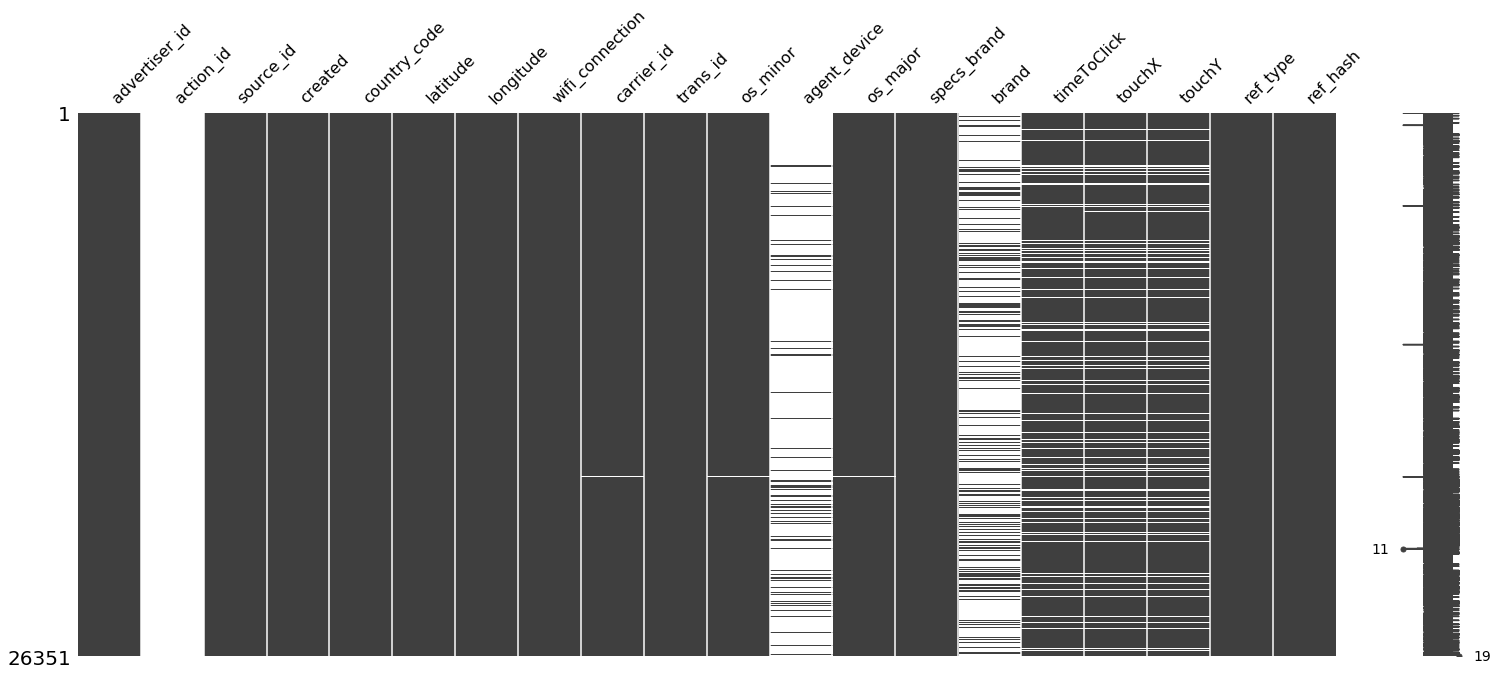

In [9]:
msno.matrix(clicks)

## Peeking each column

In [9]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06 22:42:12.755000+00:00,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08 10:24:30.641000+00:00,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08 15:24:16.069000+00:00,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06 03:08:51.543000+00:00,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06 03:32:55.570000+00:00,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [6]:
clicks.advertiser_id.unique() # 7 Unique advertiser ids

array([2, 0, 5, 3, 1, 8, 7], dtype=int64)

In [7]:
clicks.source_id.unique()

array([ 4,  0,  3,  1,  2,  5,  6,  8, 10,  7,  9], dtype=int64)

In [8]:
clicks.country_code.unique() # ALL values are the same

array([6333597102633388268], dtype=int64)

In [1]:
plt.scatter(clicks.latitude, clicks.longitude)

NameError: name 'plt' is not defined

In [23]:
clicks.wifi_connection.unique() # All false

array([False])

In [28]:
clicks.carrier_id.unique() # 55 unique carriers wo NaN

array([  1.,   4.,   6.,  45.,  27.,  nan,  19.,  18.,   3.,  13.,  24.,
        15.,  10.,  21.,   0.,   9.,  12.,  25.,   5.,  30.,   2.,  29.,
        67.,  14.,  74.,  26.,  75.,  33.,  22.,  28.,  65.,  76.,  11.,
        17.,  91.,  77.,  69.,  93.,  39.,  31., 102., 103., 105., 106.,
        35.,  52.,  59.,  48.,  37., 113.,  55.,  34., 115., 112.,  80.,
       116.])

In [26]:
clicks.carrier_id.isna().sum()

11

In [31]:
clicks.trans_id.nunique() # Transaction ids are unique for each register

26351

In [38]:
clicks.os_minor.unique() # 28 OS versions

array([6.76813741e+18, 3.02521945e+18, 5.97565607e+18, 3.37863995e+18,
                  nan, 6.39156710e+18, 7.55367603e+18, 6.66662581e+17,
       3.51153782e+18, 3.87570706e+18, 3.39996160e+18, 6.38096315e+18,
       3.13860584e+18, 8.50225519e+18, 4.21339124e+18, 3.17802727e+18,
       7.72856597e+18, 8.61372192e+18, 4.10688972e+18, 7.20901744e+18,
       5.47606382e+18, 4.46389214e+18, 2.45575206e+18, 9.08108195e+18,
       4.20691218e+18, 9.17554878e+17, 6.42365938e+18, 7.83746445e+18,
       7.69994994e+18])

In [52]:
clicks.os_minor.value_counts()

3.378640e+18    6922
6.768137e+18    3747
5.975656e+18    3683
3.511538e+18    3257
6.391567e+18    3093
3.025219e+18    3047
3.875707e+18     651
3.399962e+18     591
7.553676e+18     576
6.666626e+17     445
4.213391e+18      79
4.106890e+18      44
8.613722e+18      36
8.502255e+18      35
3.178027e+18      34
3.138606e+18      22
7.209017e+18      20
7.728566e+18      13
2.455752e+18      10
9.175549e+17       8
6.380963e+18       8
4.463892e+18       5
4.206912e+18       3
5.476064e+18       3
6.423659e+18       2
9.081082e+18       2
7.699950e+18       2
7.837464e+18       1
Name: os_minor, dtype: int64

In [42]:
clicks.agent_device.nunique()

190

[]

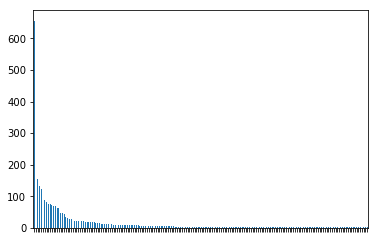

In [49]:
clicks.agent_device.value_counts().plot(kind='bar').set_xticklabels([])

In [56]:
clicks.os_major.unique() # 12 unique

array([3.07284934e+18, 1.77408510e+18, 4.56645391e+18,            nan,
       7.45240570e+18, 1.56383029e+18, 5.74580514e+18, 6.69357851e+18,
       7.49973195e+18, 2.83531211e+18, 4.07221146e+18, 7.43648083e+17,
       6.92818305e+18])

In [57]:
clicks.os_major.value_counts()

3.072849e+18    7430
4.566454e+18    6922
1.774085e+18    6304
7.452406e+18    3669
5.745805e+18     818
6.693579e+18     616
1.563830e+18     445
2.835312e+18      64
7.499732e+18      41
4.072211e+18      20
7.436481e+17       8
6.928183e+18       2
Name: os_major, dtype: int64

In [59]:
clicks.specs_brand.unique() # 5

array([2733035977666442898,  392184377613098015, 8930605132947907029,
       3855167788531275156, 5675295985273558497])

In [61]:
clicks.specs_brand.value_counts()

392184377613098015     16172
2733035977666442898    10164
8930605132947907029       10
3855167788531275156        4
5675295985273558497        1
Name: specs_brand, dtype: int64

In [63]:
clicks.brand.value_counts() # 13

2.0     2027
0.0     1917
1.0     1521
4.0      240
3.0      186
5.0      129
6.0      124
7.0       32
9.0       31
8.0       16
10.0       8
12.0       3
13.0       1
Name: brand, dtype: int64

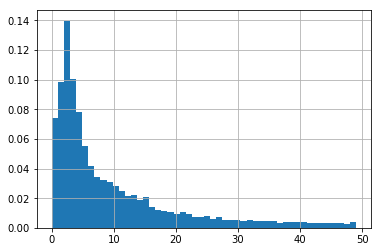

In [10]:
clicks.timeToClick.fillna(999).map(round).loc[lambda s: s < 50].hist(bins=50, density=True)

In [128]:
temp = (clicks.dropna(subset=['timeToClick'])
              .assign(timeToClick=lambda df: df.timeToClick.map(round))
              .loc[lambda df: df.timeToClick <= 60])

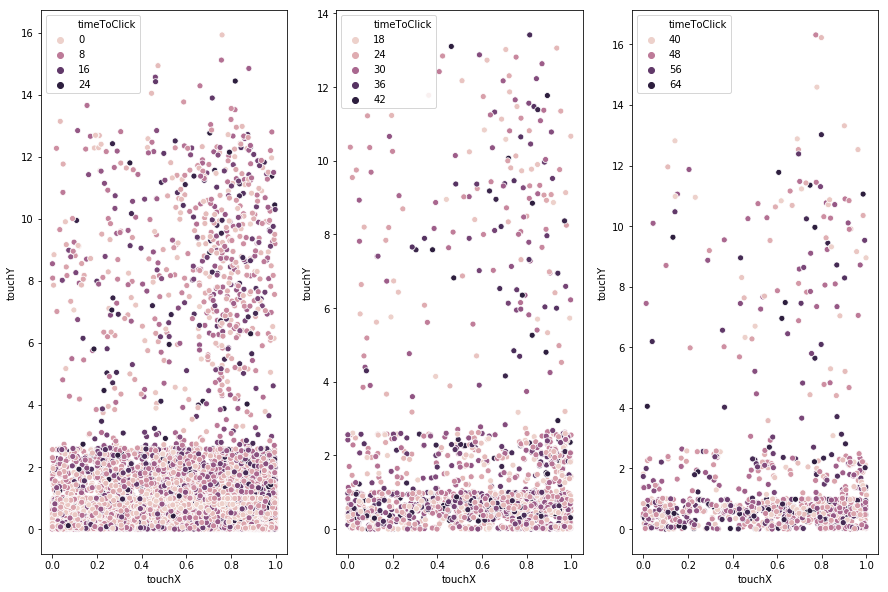

In [132]:
fig, ax = plt.subplots(1,3,figsize=(15,10))
sns.scatterplot('touchX', 'touchY', hue='timeToClick', data=temp.loc[temp.timeToClick <= 20], ax=ax[0])
sns.scatterplot('touchX', 'touchY', hue='timeToClick', data=temp.loc[temp.timeToClick.isin(range(21,40))], ax=ax[1])
sns.scatterplot('touchX', 'touchY', hue='timeToClick', data=temp.loc[temp.timeToClick >= 40], ax=ax[2])

In [38]:
clicks.ref_type.unique() # 4 ref types

array([1891515180541284343, 1494519392962156891, 5016171802147987303,
       6323871695571587575])

In [42]:
clicks.ref_hash.nunique()

17119

## Daily patterns

In [11]:
clicks.created.describe()

count                                26351
unique                               26347
top       2019-03-10 05:02:10.703000+00:00
freq                                     2
first     2019-03-05 01:17:30.663000+00:00
last      2019-03-13 23:59:59.298000+00:00
Name: created, dtype: object

In [63]:
bywday = clicks.groupby(clicks.created.dt.dayofweek).size().reset_index()

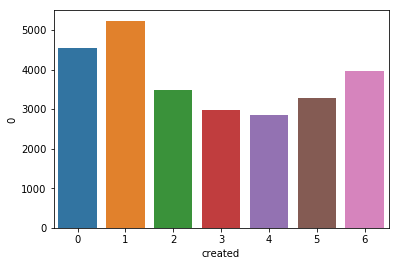

In [66]:
sns.barplot('created', 0, data=bywday)

In [74]:
byday = clicks.groupby(clicks.created.dt.dayofyear).size().to_frame('count').reset_index()

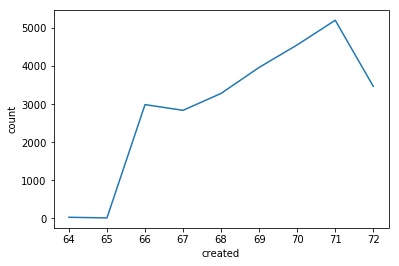

In [75]:
sns.lineplot('created', 'count', data=byday)

In [88]:
temp = (clicks.assign(day=clicks.created.dt.dayofyear, hour=clicks.created.dt.hour)
              .groupby(['day', 'hour']).size().to_frame('count').reset_index().reset_index())

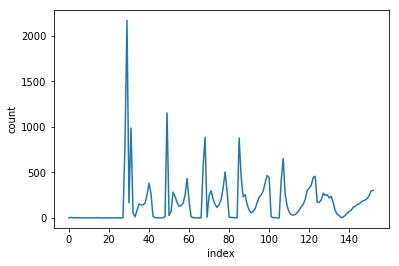

In [90]:
sns.lineplot('index', 'count', data=temp)

In [99]:
temp = (temp.pivot(index='day', columns='hour', values='count')
            .fillna(0)
            .stack()
            .to_frame('count')
            .reset_index()
            .reset_index())

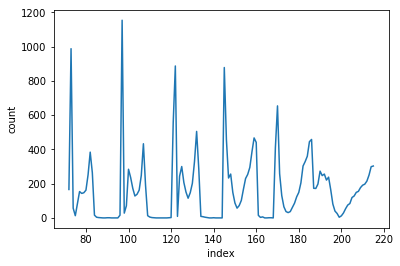

In [116]:
sns.lineplot('index', 'count', data=temp.loc[temp.day>=67])

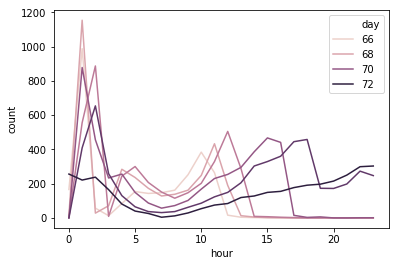

In [115]:
sns.lineplot('hour', 'count', hue='day', data=temp.loc[temp.day>=67])

In [124]:
temp = temp.assign(weekend = temp.day.map(lambda x: 1 if x in [68,69] else 0))

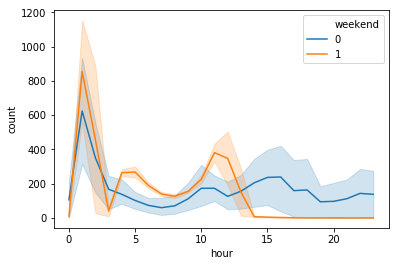

In [126]:
sns.lineplot('hour', 'count', hue='weekend', data=temp.loc[temp.day>=67])